# Desenvolvimento do Modelo LSTM

Este notebook implementa um modelo de deep learning utilizando LSTM para capturar padrões temporais nos dados de preços das ações baixadas no arquivo `PETR4.SA_data.csv`.

In [1]:
# Instalar bibliotecas necessárias
%pip install pandas numpy scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2025-05-18 14:47:04.782490: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-18 14:47:04.790865: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 14:47:04.861106: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 14:47:04.915773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747590424.967019    6929 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747590424.98

In [3]:
# Carregar os dados
data = pd.read_csv('../downloadData/data/PETR4.SA_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ajustar as colunas relacionadas à moeda para duas casas decimais
for col in ['Close', 'High', 'Low', 'Open']:
    data[col] = data[col].round(2)

# Garantir que a coluna Volume seja tratada como número inteiro
data['Volume'] = data['Volume'].astype(int)

# Selecionar a coluna de fechamento ajustado
features = data[['Close', 'Open', 'High', 'Low', 'Volume']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
# X, y = create_sequences(scaled_features, sequence_length)

In [4]:
# Criar sequências para o modelo LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length][0])  # Apenas o índice 0 (Close)
    return np.array(sequences), np.array(labels)

sequence_length = 60
X, y = create_sequences(scaled_features, sequence_length)

In [5]:
# Dividir os dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Construir o modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

E0000 00:00:1747590429.197028    6929 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747590429.198682    6929 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/diogo/Fase 4/TechChallenge_Fase4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0063 - val_loss: 2.9204e-04
Epoch 2/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.5334e-04 - val_loss: 2.5627e-04
Epoch 3/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.3614e-04 - val_loss: 2.4509e-04
Epoch 4/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.6177e-04 - val_loss: 3.1319e-04
Epoch 5/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.8952e-04 - val_loss: 1.7482e-04
Epoch 6/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.5894e-04 - val_loss: 1.2076e-04
Epoch 7/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.4029e-04 - val_loss: 1.1155e-04
Epoch 8/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.2971e-04 - val_loss: 1.4708e-04
Epoch 9/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.3515e-04 - val_loss: 1.3150e-04
Epoch 10/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.6001e-04 - val_loss: 1.0559e-04
Epoch 11/20
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step

In [8]:
# Avaliar o modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mape = mean_absolute_percentage_error(y_val, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
MAE: 0.008761477778758511
RMSE: 0.012861972422241968
MAPE: 0.10710292268292437


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


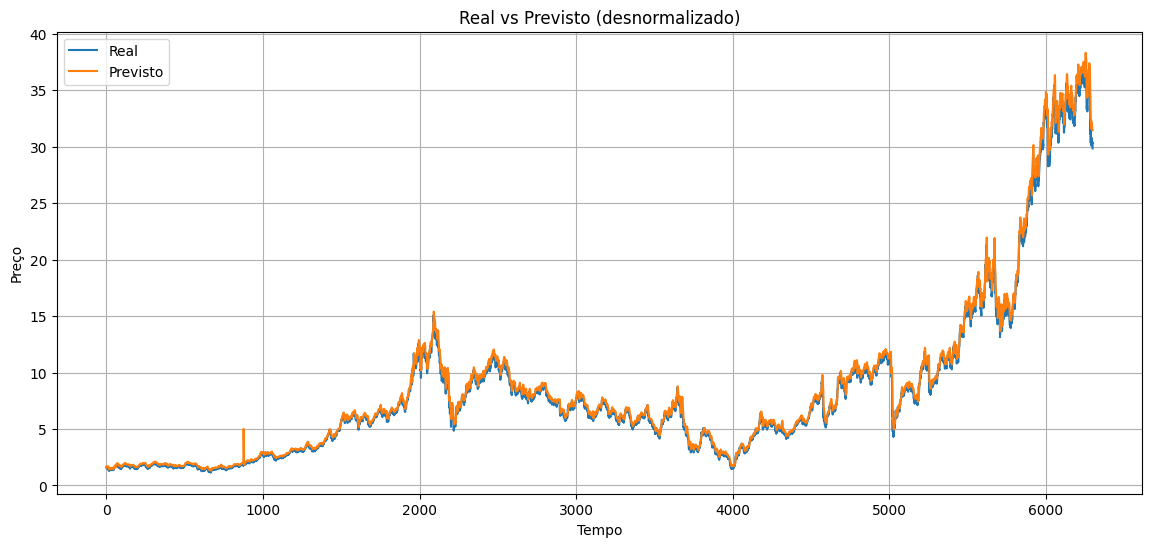

In [11]:
# previsões
y_pred = model.predict(X).flatten()

# índice da coluna "Close" no seu scaler
close_ix = 3  

# pega valores originais de min e max
min_close = scaler.data_min_[close_ix]
max_close = scaler.data_max_[close_ix]

# desnormaliza
y_true_unscaled = y * (max_close - min_close) + min_close
y_pred_unscaled = y_pred * (max_close - min_close) + min_close

# plota
plt.figure(figsize=(14, 6))
plt.plot(y_true_unscaled, label="Real")
plt.plot(y_pred_unscaled, label="Previsto")
plt.title("Real vs Previsto (desnormalizado)")
plt.xlabel("Tempo")
plt.ylabel("Preço")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --upgrade scikeras scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
#Ajustando os hiperparâmetros exemplo: 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def train_and_evaluate_model(units, dropout, lr, batch_size, epochs):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout),
        LSTM(units),
        Dropout(dropout),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)
    
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mape = mean_absolute_percentage_error(y_val, y_pred)
    
    print(f"Config: units={units}, dropout={dropout}, lr={lr}, batch_size={batch_size}, epochs={epochs}")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}\n")

# Testar 2 configurações simples
train_and_evaluate_model(units=50, dropout=0.2, lr=0.001, batch_size=32, epochs=20)
train_and_evaluate_model(units=64, dropout=0.3, lr=0.0005, batch_size=16, epochs=30)


/home/diogo/Fase 4/TechChallenge_Fase4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Config: units=50, dropout=0.2, lr=0.001, batch_size=32, epochs=20
MAE: 0.0104, RMSE: 0.0136, MAPE: 0.1980



/home/diogo/Fase 4/TechChallenge_Fase4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Config: units=64, dropout=0.3, lr=0.0005, batch_size=16, epochs=30
MAE: 0.0068, RMSE: 0.0114, MAPE: 0.0761



In [15]:
#Ajustando os hiperparâmetros exemplo: 2
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

results = []

def train_and_evaluate_model(units, dropout, lr, batch_size, epochs):
    model = Sequential([
        # Agora usando Input(), como sugerido no warning
        LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(dropout),
        LSTM(units),
        Dropout(dropout),
        Dense(25),
        Dense(1)
    ])
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

    # EarlyStopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stop]
    )
    
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mape = mean_absolute_percentage_error(y_val, y_pred)
    
    print(f"Config: units={units}, dropout={dropout}, lr={lr}, batch_size={batch_size}, epochs={epochs}")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}\n")
    
    # Salva no DataFrame
    results.append({
        "units": units,
        "dropout": dropout,
        "learning_rate": lr,
        "batch_size": batch_size,
        "epochs": epochs,
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape
    })

# Testar múltiplas configurações
train_and_evaluate_model(units=50, dropout=0.2, lr=0.001, batch_size=32, epochs=50)
train_and_evaluate_model(units=64, dropout=0.3, lr=0.0005, batch_size=16, epochs=50)

# Mostrar todos os resultados
df_results = pd.DataFrame(results)
print("\n📊 Resultados comparativos:")
print(df_results.sort_values("RMSE"))


/home/diogo/Fase 4/TechChallenge_Fase4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Config: units=50, dropout=0.2, lr=0.001, batch_size=32, epochs=50
MAE: 0.0080, RMSE: 0.0134, MAPE: 0.0729



/home/diogo/Fase 4/TechChallenge_Fase4/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Config: units=64, dropout=0.3, lr=0.0005, batch_size=16, epochs=50
MAE: 0.0109, RMSE: 0.0173, MAPE: 0.1398


📊 Resultados comparativos:
   units  dropout  learning_rate  batch_size  epochs       MAE      RMSE  \
0     50      0.2         0.0010          32      50  0.008046  0.013367   
1     64      0.3         0.0005          16      50  0.010937  0.017336   

       MAPE  
0  0.072936  
1  0.139818  


In [16]:
# Salvar o modelo treinado
model.save('../app//model/model_lstm.keras')
print('Modelo salvo com sucesso!')

Modelo salvo com sucesso!
